<a href="https://colab.research.google.com/github/Harrystone/Deep-Learning-Assignment/blob/main/winequality_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Deep Learning Class/Assignment-1/winequality-white.csv"

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         4898 non-null   bool 
 1   volatile acidity      4898 non-null   bool 
 2   citric acid           4898 non-null   bool 
 3   residual sugar        4898 non-null   bool 
 4   chlorides             4898 non-null   bool 
 5   free sulfur dioxide   4898 non-null   bool 
 6   total sulfur dioxide  4898 non-null   bool 
 7   density               4898 non-null   bool 
 8   pH                    4898 non-null   bool 
 9   sulphates             4898 non-null   bool 
 10  alcohol               4898 non-null   bool 
 11  quality               4898 non-null   bool 
dtypes: bool(12)
memory usage: 57.5 KB


In [ ]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

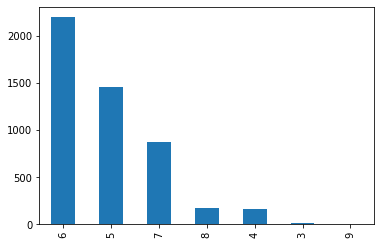

In [ ]:
data['quality'].value_counts().plot(kind='bar');

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state = 34)

In [ ]:
x.shape

(4898, 11)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[ 0.77841253,  0.11572369,  2.80878002, ..., -1.92087851,
        -0.70475467, -1.30520305],
       [-1.49934945, -0.96694813, -0.36049177, ..., -0.78399343,
        -0.35719331, -0.33869403],
       [-0.18064514,  1.69051905, -0.27708988, ..., -0.44961546,
        -0.27030297,  1.35269676],
       ...,
       [-2.45840713, -0.17955045, -0.86090311, ...,  1.82415471,
        -1.83432909,  0.78889983],
       [-1.13970282,  0.01729898, -1.61152011, ...,  0.62039403,
        -0.44408365, -0.82194854],
       [-0.18064514,  0.01729898, -0.19368799, ..., -0.9846202 ,
        -0.18341263,  0.70835741]])

In [ ]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x_train_scaled, y_train.values, batch_size=32, epochs=100, validation_data= None, validation_split=0.2, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 4ms/step - loss: 31.6836 - val_loss: 27.7933
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 18.2822 - val_loss: 11.3476
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 6.2590 - val_loss: 4.2820
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 3.2832 - val_loss: 2.9188
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 2.4865 - val_loss: 2.3242
Epoch 6/100
86/86 [==============================] - 0s 4ms/step - loss: 2.0320 - val_loss: 1.9404
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 1.7012 - val_loss: 1.6371
Epoch 8/100
86/86 [==============================] - 0s 3ms/step - loss: 1.4352 - val_loss: 1.3822
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 1.2195 - val_loss: 1.1831
Epoch 10/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0462 - val_loss: 1.0317
Epoch

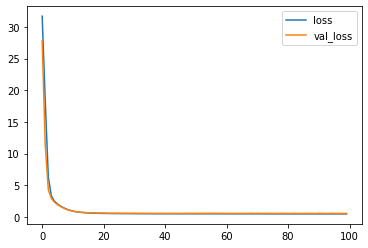

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test_scaled)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

0.5543034446482755
0.7055087372170047
